In [ ]:
#!/usr/bin/env python
# coding: utf-8

# spike conversion algorithm.
# Spike time array contains values of spike times in ms.
# Saved arrays :

# X: Array of the EMG Digital time series data with length = 300
# Y: Array of the labels of theing data with length = 300

# spike_times_up: Spike time arrays with upward polarity in ms for X. length = 300
# spike_times_dn: Spike time arrays with downward polarity in ms for X. length = 300

# Author : Nikhil Garg, 3IT Sherbrooke ; nikhilgarg.bits@gmail.com
# Created : 15 July 2020
# Last edited : 12th September 2020

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.signal import butter, lfilter, welch, square  # for signal filtering
from utilis import *
from args import args as my_args

In [ ]:
fs = 1000
nb_channels = 64
len_trial = 1000  # 2 seconds of trial, sampling rate is 200

In [ ]:
pwd = os.getcwd()
path = pwd + '\\dataset\\bci_3.npz'

In [ ]:
data = np.load(path, mmap_mode='r')
for k in data.files:
    print(k)

X
events
X_test


In [55]:
print(data['events'].shape)
print(data['X'].shape)
print(data['X_test'].shape)

(278, 1)
(278, 64, 3000)
(100, 64, 3000)


In [56]:
# data = np.load('/Users/Anonymous/Desktop/spike_encoding_toolbox/dataset/bci3/bci3epochs.npz')
X = np.array(data['X'])
Y = np.array(data['events'])

In [57]:
X = np.moveaxis(X, 2, 1)

In [58]:
X.shape

(278, 3000, 64)

In [59]:
# VERBOSE = True
# # pwd = os. getcwd()
# data_dir = "/Users/Anonymous/Desktop/spike_encoding_toolbox/dataset/bci3/bci3epochs.npz"
    
# #Add data here
# data = np.load('/Users/Anonymous/Desktop/spike_encoding_toolbox/dataset/bci3/bci3epochs.npz')
# X = data['X']
# Y = data['y']
# X = np.array(X)
# Y = np.array(Y)

# X_uniform is a time series data array with length of 400. The initial segments are about 397, 493 etc which
# makes it incompatible in some cases where uniform input is desired.

nb_trials = X.shape[0]


In [60]:
nb_trials

278

In [61]:
# X_uniform = np.ones((nb_trials, len_trial, nb_channels))
# for i in range(len(X)):
#     trial_length = X[i].shape[0]
#     if trial_length > len_trial:
#         X_uniform[i] = X[i][0:len_trial]
#     elif trial_length < len_trial:
#         short = len_trial - trial_length
#         pad = np.zeros((short, nb_channels))
#         X_uniform[i] = np.append(X[i], pad, axis=0)
#     else:
#         X_uniform[i] = X[i]
# # print(len(X))
# print("Number of samples in dataset:")
# print(len(X_uniform))
print(len(Y))
# print("Class labels:")


278


In [62]:
Y

array([[-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],

In [63]:
X_uniform=X

In [64]:
interpfact = 2
refractory_period = 1  # in ms
th_up = 5
th_dn = 5


# Generate the  data
spike_times_up = []
spike_times_dn = []
for i in range(len(X)):
    spk_up, spk_dn = gen_spike_time(
        time_series_data=X[i],
        interpfact=interpfact,
        fs=fs,
        th_up=th_up,
        th_dn=th_dn,
        refractory_period=refractory_period,
    )
    spike_times_up.append(spk_up)
    spike_times_dn.append(spk_dn)


rate_up = gen_spike_rate(spike_times_up)
rate_dn = gen_spike_rate(spike_times_up)
avg_spike_rate = (rate_up+rate_dn)/2
print("Average spiking rate")
print(avg_spike_rate)


Average spiking rate
88.25162994604317


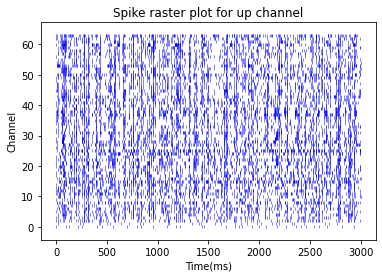

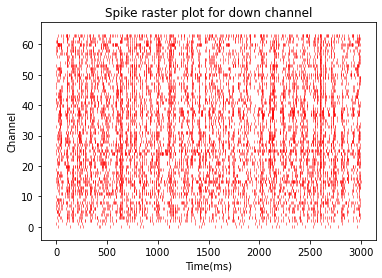

In [65]:
# Plot a up segment
plt.eventplot(spike_times_up[1], color=[0, 0, 1], linewidth=0.5)
plt.xlabel("Time(ms)")
plt.ylabel("Channel")
plt.title("Spike raster plot for up channel")
plt.show()
plt.clf()
# Plot a dn segment
plt.eventplot(spike_times_dn[1], color=[1, 0, 0], linewidth=0.5)
plt.xlabel("Time(ms)")
plt.ylabel("Channel")
plt.title("Spike raster plot for down channel")
plt.show()

In [68]:
pwd = os.getcwd()
path = pwd + '\\dataset\\bci_3_encoded.npz'

In [69]:
spike_times_up = np.array(spike_times_up)
spike_times_up = np.array(spike_times_up)



np.savez_compressed(
    path,
    Y_Train=Y,
    Y_Test=Y,
    spike_times_train_up=spike_times_up,
    spike_times_train_dn=spike_times_dn,
    spike_times_test_up=spike_times_up,
    spike_times_test_dn=spike_times_dn,
)

C:\Users\nikhil.garg\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [49]:
spike_times_up = np.array(spike_times_up)
spike_times_up = np.array(spike_times_up)


C:\Users\NIKHIL~1.GAR\AppData\Local\Temp/ipykernel_20388/1279468158.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times_up = np.array(spike_times_up)


ValueError: x and y must have same first dimension, but have shapes (600,) and (1000, 64)

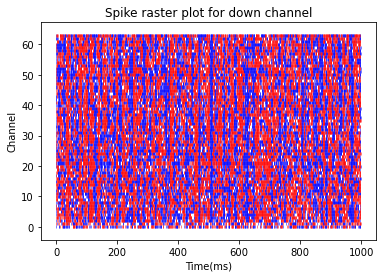

In [91]:
_t = np.arange(
    0, 3000, 5
)  # Time array of 2000ms for the 200 samples per second. For ploting purpose.
_t_spike = np.arange(0, 3000, 5)  # Time array for defining the X axis of graph.

# Plot a up segment
plt.eventplot(spike_times_up[1], color=[0, 0, 1], linewidth=0.5)
plt.xlabel("Time(ms)")
plt.ylabel("Channel")
plt.title("Spike raster plot for up channel")

# Plot a dn segment
plt.eventplot(spike_times_dn[1], color=[1, 0, 0], linewidth=0.5)
plt.xlabel("Time(ms)")
plt.ylabel("Channel")
plt.title("Spike raster plot for down channel")

channels = np.linspace(0, nb_channels-1, num=nb_channels)

plt.plot(_t, X[1], linewidth=0.5)
plt.legend(channels)
plt.title("Raw Data")
plt.xlabel("Time(ms)")
plt.ylabel("Amplitude")
pwd = os.getcwd()
fig_dir = pwd + '/plots/'
fig_name = 'encoded-data'  + ".svg"

plt.savefig(fig_dir+fig_name)
plt.clf()

spike_times_up = np.array(spike_times_up)
spike_times_up = np.array(spike_times_up)


file_path = "dataset/"
file_name = 'bci3' + ".npz"

np.savez_compressed(
    file_path + file_name,
    X_Train=X_Train,
    Y_Train=Y,
    X_Test=X_Test,
    Y_Test=Y,
    spike_times_up=spike_times_up,
    spike_times_dn=spike_times_dn,
)